In [0]:
!pip install -qq qiskit

     |████████████████████████████████| 1.6MB 4.8MB/s 
     |████████████████████████████████| 21.6MB 1.6MB/s 
     |████████████████████████████████| 92kB 22.5MB/s 
     |████████████████████████████████| 102kB 29.9MB/s 
     |████████████████████████████████| 983kB 36.2MB/s 
     |████████████████████████████████| 51kB 19.3MB/s 
     |████████████████████████████████| 51kB 21.6MB/s 
     |████████████████████████████████| 5.3MB 24.5MB/s 
     |████████████████████████████████| 71kB 22.8MB/s 
     |████████████████████████████████| 532kB 41.3MB/s 
     |████████████████████████████████| 21.5MB 28.1MB/s 
     |████████████████████████████████| 2.3MB 28.0MB/s 
     |████████████████████████████████| 61kB 24.0MB/s 
     |████████████████████████████████| 61kB 22.2MB/s 
     |████████████████████████████████| 102kB 26.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


In [0]:
from qiskit import *
from qiskit.visualization import plot_histogram

%matplotlib inline

In [0]:
a = input("""Please choose a coefficient (in bits) for the function f(x) = ax that maps to {0,1}.
                It is assumed that any input has the same number of bits as a.
                The quantum circuit will decide what it is in one query.
                """)
num_bits = len(a)

qr0 = QuantumRegister(num_bits, "q0")
qr1 = QuantumRegister(1, "q1")
cr = ClassicalRegister(num_bits)
circuit = QuantumCircuit(qr0, qr1, cr)

circuit.x(qr1)
circuit.h(qr0)
circuit.h(qr1)
circuit.barrier()

for i in range(num_bits):
    bit = int(a[i])
    assert(bit == 1 or bit == 0)
    if bit == 1:
        circuit.cx(qr0[num_bits - i - 1], qr1)

circuit.barrier()
circuit.h(qr0)
circuit.measure(qr0, cr)

Please choose a coefficient (in bits) for the function f(x) = ax that maps to {0,1}.
                It is assumed that any input has the same number of bits as a.
                The quantum circuit will decide what it is in one query.
                101011


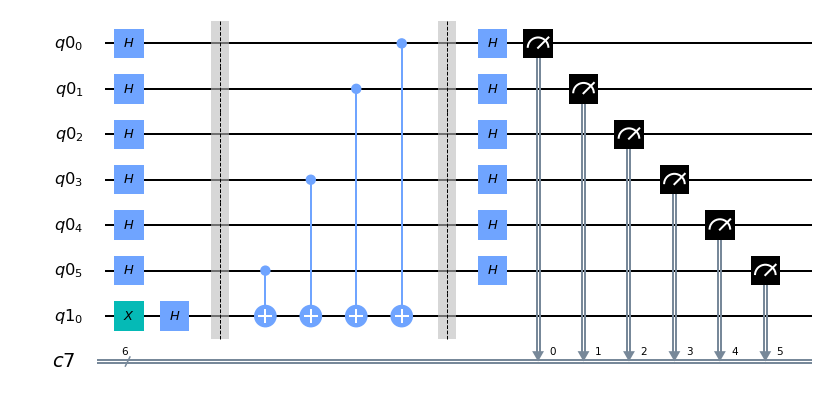

In [0]:
circuit.draw(output='mpl')

In [0]:
simulator = Aer.get_backend('qasm_simulator')
shots = 100
job = execute(circuit, simulator, shots=shots)
result = job.result()
counts = result.get_counts(circuit)

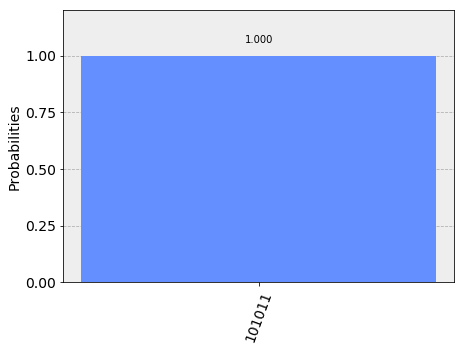

In [0]:
plot_histogram(counts)

In [0]:
max_counts_bits = ""
max_counts = 0
for bits, c in counts.items():
    if c > max_counts:
        max_counts = counts
        max_counts_bits = bits
        
print("Your chosen coefficient was " + max_counts_bits)

Your chosen coefficient was 101011
